# Whisper API
----
Descriptions:

Untuk melakukan Transcribe video youtube melalui Link yang di input dengan Whisper API menjadi sebuah text.

In [1]:
# Install Whisper API
!pip -qqq install git+https://github.com/openai/whisper.git 

# Install Pytube
!pip -qqq install pytube

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00


In [2]:
# Import the libraries 
from pytube import YouTube
import whisper
import torch 
import os
import flask
from IPython import get_ipython

# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model 
whisper_model = whisper.load_model("tiny", device=device)

100%|█████████████████████████████████████| 72.1M/72.1M [00:00<00:00, 93.0MiB/s]



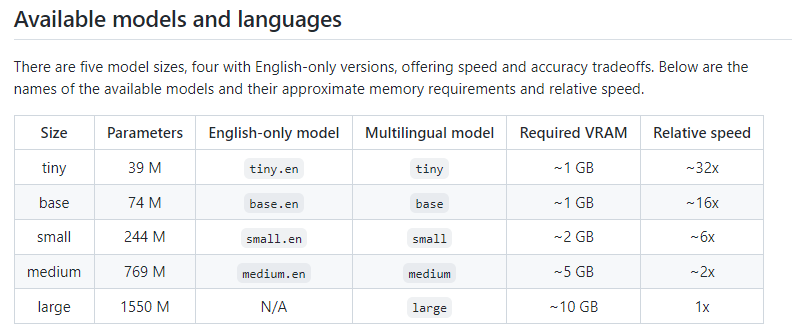



In [9]:
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model 
whisper_model = whisper.load_model("tiny", device=device)

# Function for video to audio
def video_to_audio(video_URL, destination, final_filename):

  # Get the video
  video = YouTube(video_URL)

  # Convert video to Audio
  audio = video.streams.filter(only_audio=True).first()

  # Save to destination
  output = audio.download(output_path = destination)

  _, ext = os.path.splitext(output)
  new_file = final_filename + '.mp3'

  # Change the name of the file
  os.rename(output, new_file)

video_URL = input('Masukan link:')
destination = "."
final_filename = input('Masukan nama: ')
audio_file = final_filename + '.mp3'
video_to_audio(video_URL, destination, final_filename)
result = whisper_model.transcribe(audio_file)
print(result['text'])

Masukan link:https://www.youtube.com/watch?v=IKDsZWbm_xM&feature=youtu.be
Masukan nama: protein
 Dr. Lustick, welcome back to the podcast. As you know, I'm a huge fan, so is our audience, so I'd love to jump right in. One of the top comments that we got from our last interview together is a lot of people got motivated to want to significantly cut down on added sugar in their diet. And one of the questions that came up that I promised to ask you is that if I took this seriously and followed your recommendations and significantly cut down on sugar inside of diet, what do you think I could expect to happen in a 30-day period of time? So I'd love you to start off on that. Well, okay, Drew, all right. First of all, thank you. It's my delight to be back with you. We travel in the same circles and I just saw you watch six months ago in Japan, Gekanian, lots of fun. All right, to the point. What can you expect in 30 days? First, seven days, you can expect sheer help. That's the first thing. sh